
# Introduction to admcycles I : Basic classes, stable graphs, and relations

## Part 1: first tautological classes on the moduli space of curves


## $\S 1$ Introduction
In the first part of this lecture we are going through the notion of tautological classes and how we can use ``admcycles`` to multiply them, take intersection numbers and compare them. For example, we are going to see how to define and intersect in ``admcycles`` classes such as $\psi$-classes, $\kappa$-classes, $\lambda$-classes and stable graphs, as well as how to take pull-backs and pushforwards of them.

In the second part, we are going to see some interesting classes that are subject to nowadays research. The goal is to provide some first tools and examples so that you can take it up from there and adapt / construct what is necessary to support your research.

## $\S 2$ First tautological classes


Let $\overline{\mathcal{M}}_{g,n}$ be the moduli space of stable curves of genus $g$ and $n$ marked distict and labelled points. Recall that this space is compact of dimension $3g - 3 + n$.

There exists line bundles 
$$
\mathcal{L}_i, \;\; i = 1, \dots, n, \qquad (\mathcal{L}_i)_C = T^*_{p_i}(C)
$$
whose fiber over a smooth curve is the cotangent space at the marked point $i$. The first Chern classes of the $\mathcal{L}_i$ are referred to as $\psi$-classes:

$$
\psi_1 := c_1(\mathcal{L}_1),\;  \dots, \; \psi_n := c_1(\mathcal{L}_n) \; \in H^2(\overline{\mathcal{M}}_{g,n}).
$$


A first well-known computation is
$$
\int_{\overline{\mathcal{M}}_{1,1}} \psi_1 = \frac{1}{24},
$$
which can be computed for instance via modular forms [[Zvonkine 04, Section 2.2.2]](https://www-fourier.ujf-grenoble.fr/sites/ifmaquette.ujf-grenoble.fr/files/ete2011-zvonkine.pdf) or via Kontsevich graphs [[Kontsevich 92]](https://link.springer.com/content/pdf/10.1007/BF02099526.pdf)

In [15]:
from admcycles import *

(g,n) = (1,1)
psiclass(1,g,n).evaluate() #1/24

1/24

The cup product of $H^*(\overline{\mathcal{M}}_{g,n})$ in ``admcycles`` is indicated with the usual multiplication symbol. For instance, in order to multiply $\psi$-classes we can do:

In [16]:
(g,n) = (1,3)
C = psiclass(1,g,n)*psiclass(2,g,n)*psiclass(3,g,n)
C.evaluate()

1/12

We can easily take any monomial of $\psi$-classes and ``evaluate()`` it:

$$
\int_{\overline{\mathcal{M}}_{g,n}} \psi_1^{d_1} \cdots \psi_n^{d_n} \in \mathbb{Q}.
$$
These are called intersection numbers.

Recall that if the degree of the monomial is not equal to the dimension of the moduli space of curves, i.e. 
$$
dim(\overline{\mathcal{M}}_{g,n}) = 3g - 3 + n = d_1 + \dots + d_n,
$$
the evaluation returns zero.


#### 2.1 Exercise
Intersect over ${\overline{\mathcal{M}}_{1,4}}$ the monomials $\psi_1\psi_2\psi_3^2$ and $\psi_1^2\psi_2$.

<details><summary><b>Solution</b> (click to expand)</summary>
    
```
(g,n) = (1,4)
M1 = psiclass(1,g,n)*psiclass(2,g,n)*psiclass(3,g,n)**2
M2 = psiclass(1,g,n)**2*psiclass(2,g,n)
print(M1.evaluate(), M2.evaluate())
#You could also print words:
print("The integral of M1 equals %s, the integral of M2 equals %s, and vanishes for dimension reasons" %(M1.evaluate(), M2.evaluate()))
```

</details>

To tame intersection numbers, for instance one could pair $\psi$-classes with formal variables and execute the integration over the moduli space of curves in ``admcycles`` as a polynomial expression in these variables.

The expression
\begin{equation}
\int_{\overline{\mathcal{M}}_{0,5}} \frac{1}{\prod_{i=1}^5 (1 - x_i\psi_i)} = \left(\sum_{i=1}^5 x_i\right)^{2}
\end{equation}
(where all denominators are to be expanded as geometric series) can be at first written and computed as



In [17]:
R.<x1,x2,x3,x4,x5> = PolynomialRing(QQ)
(g,n) = (0,5)

GeomSeries1 = fundclass(g,n) + x1*psiclass(1,g,n) + x1**2*psiclass(1,g,n)**2
GeomSeries2 = fundclass(g,n) + x2*psiclass(2,g,n) + x2**2*psiclass(2,g,n)**2
GeomSeries3 = fundclass(g,n) + x3*psiclass(3,g,n) + x3**2*psiclass(3,g,n)**2
GeomSeries4 = fundclass(g,n) + x4*psiclass(4,g,n) + x4**2*psiclass(4,g,n)**2
GeomSeries5 = fundclass(g,n) + x5*psiclass(5,g,n) + x5**2*psiclass(5,g,n)**2

Int = (GeomSeries1 * GeomSeries2 * GeomSeries3 * GeomSeries4 * GeomSeries5 ).evaluate()
Int

x1^2 + 2*x1*x2 + x2^2 + 2*x1*x3 + 2*x2*x3 + x3^2 + 2*x1*x4 + 2*x2*x4 + 2*x3*x4 + x4^2 + 2*x1*x5 + 2*x2*x5 + 2*x3*x5 + 2*x4*x5 + x5^2

#### 2.2 Exercise
Check that the result is equal to the RHS of equation (1).

<details><summary><b>Solution</b> (click to expand)</summary>
    
```
Int == (x1 + x2 + x3 + x4 + x5)**2
> True
```

</details>

The $\kappa$-classes  are defined as pushforward of the psi classes through the morphisms forgetting a marked point. If 
$$
\pi^{(j)}: \overline{\mathcal{M}}_{g,n+1} \rightarrow \overline{\mathcal{M}}_{g,n}
$$
forgets the $j$-th marked point, one defines
$$
\kappa_m := \pi^{(j)}_*(\psi_j^{m+1}) \in H^{2m}(\overline{\mathcal{M}}_{g,n})
$$
and calls it with ``kappaclass(m,g,n)`` in ``admcycles``. Recall that $\pi^{(j)}_*$ descreases the complex cohomological degree by one, whereas $(\pi^{(j)})^*$ preserves it.

#### 2.3 Exercise
Check that $\kappa_1 \in H^{2}(\overline{\mathcal{M}}_{1,1})$ equals to the pushforward of $\psi_2^2 \in H^{2}(\overline{\mathcal{M}}_{1,2})$ along the morphism forgetting the second marked point.

Hint: use ``class.forgetful_pushforward([2])`` and ``(class1 - class2).is_zero()``

<details><summary><b>Solution</b> (click to expand)</summary>
    
```
(g,n) = (1,2)
RHS = (psiclass(1,g,n)**2).forgetful_pushforward([2]) # why doesn't it work with marked 1? and why it works for forgetful_pushforward([2]) with psi_1?
LHS = kappaclass(1,g,n-1)
(RHS - LHS).is_zero()
>True
```

</details>

In fact the command ``class.is_zero()`` can be given an argument ``moduli`` to check relations over the open moduli space or over partial compactifications.

The command by default executes ``class.is_zero(moduli = 'st')``

The additional options for moduli are:
* ’tl’ : treelike curves (all cycles in the stable graph have length 1) 
* ’ct’ : compact type (stable graph is a tree)
* ’rt’ : rational tails (there exists vertex of genus g)
* ’sm’ : smooth curves

#### 2.4 Exercise

Let $\mathbb{E}$ be the rank $g$ vector bundle over $\overline{\mathcal{M}}_{g,n}$ whose fiber over a generic curve $C$ is given by the space of holomorphic differential on the curve. Let

$$
\lambda_j := c_{j}(\mathbb{E}) \in H^{2j}(\overline{\mathcal{M}}_{g,n}), \qquad j=0, \dots, g.
$$
be its $j$-th Chern class. They are called in ``admcycles`` with the command ``lambdaclass(j,g,n)``.

Check Mumford relation 
$$
\lambda_1 = \frac{\kappa_1}{12} \in H^2(\mathcal{M}_g)
$$
in genus $5$. (Is there another compactification it holds true in, and why?)

<details><summary><b>Solution</b> (click to expand)</summary>
    
```
(g,n) = (2,0)
RHS = lambdaclass(1,g,n)
LHS = kappaclass(1,g,n)
(RHS - LHS).is_zero(moduli = 'sm')
>True
```

</details>

Let us see how we can easily code some more interesting objects, such as the Weil-Petersson polynomials

$$
\mathcal{V}_{g,n}(L_1, \dots, L_n) := \int_{\overline{\mathcal{M}}_{g,n}} \exp \left( 2\pi^2 \kappa_1 + \sum_{i=1}^n \psi_i \frac{L_i^2}{2} \right)
$$

The Weil-Petersson volumes are obtained as the constant coefficient in the $L_i$.

In [18]:
def expclass(X,g,n):
    return fundclass(g,n) + sum([(X^k)*(1/gamma(k+1)) for k in [1..(3*g - 3 + n)]]);

(g,n) = (1,2)

R.<x,L1,L2> = PolynomialRing(QQ)
AA = x*kappaclass(1,g,n) + ((L1**2/2)*psiclass(1,g,n) + (L2**2/2)*psiclass(2,g,n))

Weil_Petersson_poly = (expclass(AA,g,n).evaluate()).subs(x=2*pi**2)
Weil_Petersson_poly

1/4*pi^4 + 1/12*pi^2*L1^2 + 1/192*L1^4 + 1/12*pi^2*L2^2 + 1/96*L1^2*L2^2 + 1/192*L2^4

## $\S 3$ Stable graphs

Stable graphs play a fundamental role in the study of $\overline{\mathcal{M}}_{g,n}$, as for instance they provide a stratification of the moduli space. 
* They are essentially graphs with $n$ labeled leaves in which each vertex $v$ is decorated with a genus $g(v) \geq 0$ so that
$$
2 g(v) - 2 + val(v) > 0
$$
where $val(v)$ is the valency of $v$. 
* Each vertex stands for a stable connected component of the locus of curves that the graph represents, where the nodes are represented by the edges, and the labeled leaves are the marked points. 
* Self-edges of a vertex are allowed and represent pinched cycles. 
* Each vertex can be decorated with cohomological classes such as $\kappa$- and $\lambda$-classes (in the second part we will see classes with richer structure), each half-edge can be decorated with $\psi$-classes.
* The boundary pushforward 
* For a stable graph $\Gamma$ of genus $g$ with $n$ legs
$$
\xi_{\Gamma}: \overline{\mathcal{M}}_{\Gamma} := \prod_{v \in V(\Gamma)} \overline{\mathcal{M}}_{g(v), val(v)} \longrightarrow \overline{\mathcal{M}}_{g,n}
$$
is the glueing map. Its pushforward is called in ``admcycles`` via the command ``Gamma.boundary_pushforward([c1, ..., cm])``, where $c_k$ are cohomological classes decorating the $m$ (ordered in ``admcycles``) vertices of the graph.

Let us see an example:

In [19]:
Gamma1=StableGraph([2,1],[[4,1,2],[3,5]],[(4,5)])
# DESCRIPTION:
# 2 connected components of genera 2 and 1 respectively
# The first component has three half-edges attached, with labels [4,1,2]
# The second component has two half-edges attached, with labels [3,5]
# The list of edges is given by a single edge, identified as the pair (4,5) of half edges

# CONCLUSION:
# The two components are connected via the only edge. The half-edges [1,2,3] are actual leaves, the half-edges [4,5] are half-edges of an edge.

pure_graph_class = Gamma1.boundary_pushforward();
pure_graph_class

Graph :      [2, 1] [[4, 1, 2], [3, 5]] [(4, 5)]
Polynomial : 1

In fact the $(\psi, \kappa, \lambda)$-classes we used so far are encoded in ``admcycles`` as decorating the graph representing the open stratum:

In [20]:
from admcycles import *

psiclass(1,1,3)**2

Graph :      [1] [[1, 2, 3]] []
Polynomial : psi_1^2

Let us now check the formula for the self-intersection of a graph


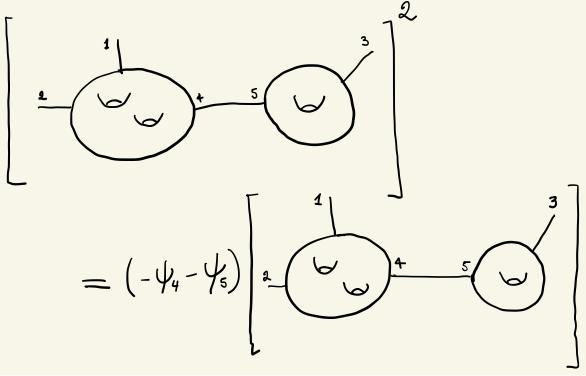

In [21]:
graph_with_psiprime = Gamma1.boundary_pushforward([fundclass(2,3),-psiclass(2,1,2)]);
graph_with_psidoubleprime = Gamma1.boundary_pushforward([-psiclass(1,2,3),fundclass(1,2)]);

self_intersection_relation = pure_graph_class*pure_graph_class - (graph_with_psiprime + graph_with_psidoubleprime)
self_intersection_relation.is_zero()

True

#### 3.1 Exercise

Check (one among) the relations:
    
\begin{equation}
\pi^*(\kappa_m) = \kappa_m - \psi_{n+1}^m
\end{equation}
and
\begin{equation}
\pi^*(\psi_i) = \psi_i - D_{{i,n+1}}
\end{equation}
for $(g,n,m,i) = (1,1,3,1)$, where $D_{{i,n+1}}$ is the graph with a rational component attached by a single node and containg the leaves $i$ and $n$.

<details><summary><b>Solution</b> (click to expand)</summary>
    
```
(g,n,m,i)=(1,1,3,1)

RHS = kappaclass(m,g,n).forgetful_pullback([n+1])
LHS = kappaclass(m,g,n+1) - psiclass(n+1,g,n+1)**m
print((RHS - LHS).is_zero())

RHS2 = psiclass(i,g,n).forgetful_pullback([n+1])
LHS2 = psiclass(i,g,n+1) - StableGraph([1,0],[[4,],[3,1,2]],[(3,4)]).boundary_pushforward()
print((RHS2 - LHS2).is_zero())

>True
>True
```

We end the section with two natural glueing morphisms.

* ``sepbdiv(h,A,g,n)`` gives the pushforward of the boundary gluing map

\begin{equation}
\xi : \overline{\mathcal{M}}_{\Gamma} = \overline{\mathcal{M}}_{h,A \cup {p}} \times \overline{\mathcal{M}}_{g-h, (\{1, \dots,n \} \setminus A) \cup \{q\}} \longrightarrow \overline{\mathcal{M}}_{g,n}
\end{equation}
where A can be a list, a set or a tuple of numbers in $\{1 \dots n \}$.

* ``irrbdiv(g,n)`` gives the pushforward of the boundary gluing map
$$
\xi' : \overline{\mathcal{M}}_{g−1,n+2} \longrightarrow \overline{\mathcal{M}}_{g,n}
$$
identifying the last two markings to a node (care factors of two for automorphisms, this map gives twice the fundamental class).

#### 3.2 Exercise

The class $\lambda_g$ vanishes when supported on the divisor given by a non-separating node (use the command ``irrbdiv``). Check for $(g,n) = (2,2)$.

<details><summary><b>Solution</b> (click to expand)</summary>
    
```
(g,n) = (2,2)
Check = irrbdiv(g,n)*lambdaclass(g,g,n)
Check.is_zero()
> True
```

</details>

## $\S 4$ Generators and bases

For each given $(g,n,d)$ with $d$ the cohomological degree ($0 \leq d \leq 3g - 3 + n $), one can print the list of stable graphs decorated with $\psi$- and $\kappa$-classes generating the tautological ring $RH^{2d}(\overline{\mathcal{M}}_{g,n})$ with the command ``list_tautgens(g,n,d)`` (recall that each node contributes one complex degree).

In [22]:
(g,n,d) = (1,3,2)
list_tautgens(g,n,d)

[0] : Graph :      [1] [[1, 2, 3]] []
Polynomial : (kappa_2)_0
[1] : Graph :      [1] [[1, 2, 3]] []
Polynomial : (kappa_1^2)_0
[2] : Graph :      [1] [[1, 2, 3]] []
Polynomial : (kappa_1)_0*psi_1
[3] : Graph :      [1] [[1, 2, 3]] []
Polynomial : (kappa_1)_0*psi_2
[4] : Graph :      [1] [[1, 2, 3]] []
Polynomial : (kappa_1)_0*psi_3
[5] : Graph :      [1] [[1, 2, 3]] []
Polynomial : psi_1^2
[6] : Graph :      [1] [[1, 2, 3]] []
Polynomial : psi_1*psi_2
[7] : Graph :      [1] [[1, 2, 3]] []
Polynomial : psi_1*psi_3
[8] : Graph :      [1] [[1, 2, 3]] []
Polynomial : psi_2^2
[9] : Graph :      [1] [[1, 2, 3]] []
Polynomial : psi_2*psi_3
[10] : Graph :      [1] [[1, 2, 3]] []
Polynomial : psi_3^2
[11] : Graph :      [0, 1] [[2, 3, 5], [1, 6]] [(5, 6)]
Polynomial : (kappa_1)_1
[12] : Graph :      [0, 1] [[2, 3, 5], [1, 6]] [(5, 6)]
Polynomial : psi_1
[13] : Graph :      [0, 1] [[2, 3, 5], [1, 6]] [(5, 6)]
Polynomial : psi_6
[14] : Graph :      [0, 1] [[1, 3, 5], [2, 6]] [(5, 6)]
Polynomial 

One could also use simply ``tautgens(g,n,d)``, although the list does not get enumerated.

Out of all these generators, after applying Pixton's relations, only a few are seen to be linearly independent.

In [23]:
(g,n,d) = (1,3,2)
generating_indices(g,n,d)

[0, 1, 2, 3, 4]

One can fish out a single one from the list simply by:

In [24]:
tautgens(g,n,d)[4]

Graph :      [1] [[1, 2, 3]] []
Polynomial : (kappa_1)_0*psi_3

Viceversa, you might construct a class and wanting to know how it decomposes into the basis which has been chosen here to be canonical. For example

In [25]:
(g,n) = (1,3)
Class1 = psiclass(3,g,n)*kappaclass(1,g,n)
Class1.basis_vector()

(0, 0, 0, 0, 1)

In [26]:
Gamma = StableGraph([1,0], [[1,4],[2,3,5]], [(4,5)])
Class2 = Gamma.boundary_pushforward([57*psiclass(1,1,2),fundclass(0,3)])
Class2.basis_vector()

(57/2, -57/2, 0, 57/2, 57/2)

#### 4.1 Exercise
Define a class in $RH^{4}(\overline{\mathcal{M}}_{1,3})$, i.e. $(g,n,d) = (1,3,2)$, that requires more than one element of the basis to be expressed. Check your guess with the command ``basis_vector()``.

<details><summary><b>Solution</b> (click to expand)</summary>
    
```
Gamma = StableGraph([1,0], [[1,4],[2,3,5]], [(4,5)])
Class2 = Gamma.boundary_pushforward([57*psiclass(1,1,2),fundclass(0,3)])
Class2.basis_vector()
> (57/2, -57/2, 0, 57/2, 57/2)
```

</details>